#### W tym notatniku przedstawione jest przykładowe użycie biblioteki.

poniżej podaje domyślne ścieżki, będą pasować do struktury w data.zip

In [13]:
import os

datadir = 'data'
rawdir = datadir + '/raw/' 
statsdir = datadir + '/stats/'
merged_dir = datadir+'/merged/'
tomdir = '/tom/'
stroopdir = '/stroop/'

Załadujmy najpierw dane z eksperymentu ToM, są w folderze data/raw/tom.
Tworzę obiekt klasy PrelDataHandler i z jego pomocą czytamy pliki z tego folderu.

In [14]:
from prel.data_handlers import stroop_dh, tom_dh

print(f"Liczba plików w folderze data/raw/tom: {len(os.listdir(rawdir+tomdir))}")

tom_handler = tom_dh.TomDataHandler(print_logs=False)

# parametr cleanser_func to powinna być funkcja która bierze i zwraca jakiś DataFrame
clean_tom_dfs = tom_handler.handle_files(rawdir+tomdir, cleanser_func=tom_dh.clean_tom_data)
print(f"Po czyszczeniu zostaje nam z tego {len(clean_tom_dfs)} dataframów.\nTak wygląda pierwszy z nich:")
display(clean_tom_dfs[0].head())

# zapisujemy sobie jeszcze id, przydadzą się kiedy będziemy zapisywać do plików
tom_ids = [x.prel_id for x in clean_tom_dfs]


Liczba plików w folderze data/raw/tom: 50
Po czyszczeniu zostaje nam z tego 26 dataframów.
Tak wygląda pierwszy z nich:


adultMind  belief  desire  control  responseCorrect  responseTime
0          1       1       0        0                1      0.909961
1          1       0       0        0                1      1.448417
2          1       0       1        0                1      0.674062
3          0       0       0        0                1      1.297932
4          1       0       0        0                0      0.510178

Weźmy jeden z dataframów i policzmy z niego statystyki. Niech będzie to pierwszy z tej listy.

Za pomocą metody `count_tom_stats` dostaniemy DataFrame ze statystykami dla każdej podgrupy - jest ich 8, bo w tym eksperymencie mamy do czynienia z trzema zmiennymi (trzy pierwsze kolumny).

In [15]:
tom_stats = tom_dh.count_tom_stats(clean_tom_dfs[0])
display(tom_stats)

adultMind  belief  desire  incorrectAns  correctAns  noAns  \
0          0       0       0             3          12      5   
1          0       0       1             4          15      1   
2          0       1       0             2          17      1   
3          0       1       1             1          14      5   
4          1       0       0             5          12      3   
5          1       0       1             3          13      4   
6          1       1       0             1          18      1   
7          1       1       1             0          19      1   

   responseTime_mean  responseTime_max  responseTime_min  responseTime_median  
0           0.866437          1.297932          0.531578             0.857385  
1           0.713068          1.121051          0.387361             0.705186  
2           0.863750          1.443515          0.484967             0.866692  
3           0.738113          1.492397          0.400850             0.714503  
4           0.890247          1.448417          0.510178             0.854294  
5           0.877910          1.502442          0.540816             0.737739  
6           0.785170          1.349196          0.473916             0.686347  
7           0.658915          1.220029          0.391159             0.535000

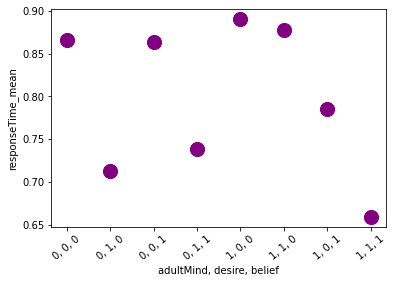

In [16]:
# Zrobimy wykres aby zwizualizować średni czas odpowiedzi:
tom_stats = tom_dh.count_tom_stats(clean_tom_dfs[0]).copy()
cnames = ['adultMind','desire','belief']
tom_stats['x'] = [(str(x)[1:-1].replace(' ',', ')) for x in tom_stats[cnames].values]

plot = tom_stats.plot.scatter(x = 'x' , y = 'responseTime_mean', rot = 40, xlabel=', '.join(cnames), s = 200, color='purple')

Sumaryzacja danych, czyli ogólne statystyki dla każdego df:

In [17]:
tom_summaries = [tom_dh.summarize_tom(x) for x in clean_tom_dfs]
display(tom_summaries[8])

responseTime_mean  responseTime_max  responseTime_min  \
responseTime           0.751221          1.446335          0.349417   

              responseTime_median  responseAccuracy  
responseTime             0.686869          0.541667

Wczytywanie danych z drugiego eksperymentu:

In [26]:
from prel.data_handlers import stroop_dh
stroop_handler = stroop_dh.StroopDataHandler()

clean_stroop_dfs = stroop_handler.handle_files(rawdir+stroopdir)   # domyślną akcją jest czyszczenie
stroop_ids = [x.prel_id for x in clean_stroop_dfs]
stroop_summaries = [stroop_handler.actions['summ'](x) for x in clean_stroop_dfs]   # tak też można uruchomić funkcję summarize

display(stroop_summaries[0])   


responseAccuracy  responseTime_mean  responseTime_max  responseTime_min  \
0          0.979167           0.897905            2.1914            0.5301   

   responseTime_median  stroopEffect  
0              0.81765      0.179831

Zapisywanie do plików i weryfikacja ścieżek. 

In [22]:
from prel.data_handlers import prel_dh

prel_handler = prel_dh.PrelDataHandler(print_logs=True)
tompath = prel_handler.verify_output(statsdir+tomdir)  # metody weryfikujące zwracają absolutne ścieżki
strooppath = prel_handler.verify_output(statsdir+stroopdir)


11:35:26|data_handler.verify_output:146|INFO: w output_dir jest już 26 plików. |
11:35:26|data_handler.verify_output:146|INFO: w output_dir jest już 27 plików. |


In [29]:

for i,x in enumerate(tom_summaries):
    prel_handler.save_file(data=x, output_dir=tompath,filename=f"{tom_ids[i]}.csv") 


for j,y in enumerate(stroop_summaries):
    prel_handler.save_file(y, strooppath, f"{stroop_ids[j]}.csv")

11:38:52|data_handler.save_file:99|WARNING: w folderze /home/xj/Documents/uw/python/nypd-zad-zal/data/stats/tom był już plik o tej samej nazwie: 08.csv i zostanie nadpisany. |
11:38:52|data_handler.save_file:99|WARNING: w folderze /home/xj/Documents/uw/python/nypd-zad-zal/data/stats/tom był już plik o tej samej nazwie: 03.csv i zostanie nadpisany. |
11:38:52|data_handler.save_file:99|WARNING: w folderze /home/xj/Documents/uw/python/nypd-zad-zal/data/stats/tom był już plik o tej samej nazwie: 18.csv i zostanie nadpisany. |
11:38:52|data_handler.save_file:99|WARNING: w folderze /home/xj/Documents/uw/python/nypd-zad-zal/data/stats/tom był już plik o tej samej nazwie: 12.csv i zostanie nadpisany. |
11:38:52|data_handler.save_file:99|WARNING: w folderze /home/xj/Documents/uw/python/nypd-zad-zal/data/stats/tom był już plik o tej samej nazwie: 05.csv i zostanie nadpisany. |
11:38:52|data_handler.save_file:99|WARNING: w folderze /home/xj/Documents/uw/python/nypd-zad-zal/data/stats/tom był już 

Teraz połączymy pliki które przed chwilą zapisaliśmy.
Funkcja `merge_prel_files` służy do łączenia z sobą danych z dwóch folderów zawierających dane eksperymentalne. Dane domyślnie zapiszą się w pliku pod nazwą [id]_merged_stats

In [31]:
merged = prel_handler.merge_prel_files(tompath,strooppath, merged_dir) 
# podanie drugiego argumentu sprawia że zrobimy plik i zapiszemy do folderu data/merged


11:40:02|data_handler.save_file:99|WARNING: w folderze /home/xj/Documents/uw/python/nypd-zad-zal/data/merged był już plik o tej samej nazwie: JSPREL17_merged_stats.csv i zostanie nadpisany. |
11:40:02|data_handler.save_file:99|WARNING: w folderze /home/xj/Documents/uw/python/nypd-zad-zal/data/merged był już plik o tej samej nazwie: JSPREL08_merged_stats.csv i zostanie nadpisany. |
11:40:02|data_handler.save_file:99|WARNING: w folderze /home/xj/Documents/uw/python/nypd-zad-zal/data/merged był już plik o tej samej nazwie: JSPREL10_merged_stats.csv i zostanie nadpisany. |
11:40:02|data_handler.save_file:99|WARNING: w folderze /home/xj/Documents/uw/python/nypd-zad-zal/data/merged był już plik o tej samej nazwie: JSPREL23_merged_stats.csv i zostanie nadpisany. |
11:40:02|data_handler.save_file:99|WARNING: w folderze /home/xj/Documents/uw/python/nypd-zad-zal/data/merged był już plik o tej samej nazwie: JSPREL15_merged_stats.csv i zostanie nadpisany. |
11:40:02|data_handler.save_file:99|WARNI

ToM_responseTime_mean  ToM_responseTime_max  ToM_responseTime_min  \
0               0.839038              1.465503                0.4668   

   ToM_responseTime_median  ToM_responseAccuracy participantId  \
0                 0.790469              0.890625            17   

   Stroop_responseAccuracy  Stroop_responseTime_mean  Stroop_responseTime_max  \
0                 0.989583                  0.975524                   2.1354   

   Stroop_responseTime_min  Stroop_responseTime_median  Stroop_stroopEffect  
0                    0.523                      0.9176             0.280523

Złączone pliki mają zmienione nazwy kolumn.

In [35]:

display(merged[0])
print("chyba lepiej oglądać to pionowo:")
display(merged[0].T)

ToM_responseTime_mean  ToM_responseTime_max  ToM_responseTime_min  \
0               0.839038              1.465503                0.4668   

   ToM_responseTime_median  ToM_responseAccuracy participantId  \
0                 0.790469              0.890625            17   

   Stroop_responseAccuracy  Stroop_responseTime_mean  Stroop_responseTime_max  \
0                 0.989583                  0.975524                   2.1354   

   Stroop_responseTime_min  Stroop_responseTime_median  Stroop_stroopEffect  
0                    0.523                      0.9176             0.280523

chyba lepiej oglądać to pionowo:


0
ToM_responseTime_mean       0.839038
ToM_responseTime_max        1.465503
ToM_responseTime_min          0.4668
ToM_responseTime_median     0.790469
ToM_responseAccuracy        0.890625
participantId                     17
Stroop_responseAccuracy     0.989583
Stroop_responseTime_mean    0.975524
Stroop_responseTime_max       2.1354
Stroop_responseTime_min        0.523
Stroop_responseTime_median    0.9176
Stroop_stroopEffect         0.280523

Powinniśmy mieć teraz po jednym pliku na każde id w folderze data/merged. Możemy je skonkatenować za pomocą metody `concat`. Dostaniemy dane o statystykach dla wszystkich id w jednym DataFrame, z opcją zapisu do pliku. 

In [33]:
all_data = prel_handler.concat_files(merged_dir)
display(all_data)

ToM_responseTime_mean  ToM_responseTime_max  ToM_responseTime_min  \
0                0.654788              1.435285              0.329977   
1                0.622150              1.486794              0.336394   
2                0.458803              0.965139              0.318947   
3                0.657134              1.497722              0.383166   
4                0.524903              1.490550              0.230957   
5                0.529903              1.240430              0.265299   
6                0.839038              1.465503              0.466800   
7                0.484819              1.351650              0.319565   
8                0.722033              1.463492              0.411311   
9                0.604429              1.472460              0.371187   
10               0.645944              1.378400              0.309689   
11               0.402593              0.699626              0.248873   
12               0.818948              1.494106              0.547609   
13               0.427894              1.071501              0.050157   
14               0.761440              1.407717              0.429923   
15               0.637137              1.494789              0.380198   
16               0.740425              1.470695              0.121519   
17               0.601931              1.492978              0.347890   
18               0.796753              1.502442              0.387361   
19               0.515980              1.336907              0.229891   
20               0.643224              1.502355              0.351878   
21               0.502906              1.464397              0.292674   
22               0.659545              1.488337              0.312902   
23               0.783510              1.167365              0.447413   
24               0.668172              1.433724              0.302523   
25               0.751221              1.446335              0.349417   

    ToM_responseTime_median  ToM_responseAccuracy participantId  \
0                  0.563497              0.828125            22   
1                  0.507032              0.942708            20   
2                  0.434164              0.578125            11   
3                  0.580172              0.921875            12   
4                  0.451999              0.854167            05   
5                  0.472527              0.515625            09   
6                  0.790469              0.890625            17   
7                  0.433463              0.880208            26   
8                  0.676058              0.557292            15   
9                  0.537946              0.880208            04   
10                 0.553329              0.817708            18   
11                 0.382991              0.890625            01   
12                 0.733994              0.833333            21   
13                 0.400559              0.901042            03   
14                 0.681508              0.828125            06   
15                 0.541410              0.968750            27   
16                 0.650988              0.703125            14   
17                 0.502801              0.921875            10   
18                 0.705222              0.687500            08   
19                 0.431602              0.958333            23   
20                 0.551695              0.906250            24   
21                 0.415264              0.869792            16   
22                 0.569077              0.755208            13   
23                 0.793194              0.765625            25   
24                 0.601321              0.739583            02   
25                 0.686869              0.541667            19   

    Stroop_responseAccuracy  Stroop_responseTime_mean  \
0                  1.000000                  1.124343   
1                  0.979167                  0.721588   
2                  1.000000                  0.8049

Teraz możemy policzyć jakieś naprawdę ciekawe statystyki, np.:  

<AxesSubplot:xlabel='Stroop_stroopEffect', ylabel='ToM_responseAccuracy'>

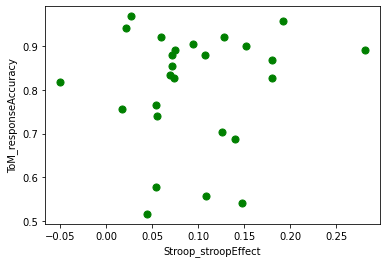

In [70]:
all_data.sort_values(by='Stroop_stroopEffect').plot.scatter(x='Stroop_stroopEffect', y='ToM_responseAccuracy', s = 50, color='green')

Na pierwszy rzut oka nie widać tu jakichś korelacji. Pozbędę się ręcznie wierszy, które efekt Stroopa mają mniejszy niż 0 albo mają niski procent poprawnych odpowiedzi w ToM.

In [61]:
b_data = all_data[(all_data["Stroop_stroopEffect"] > 0)  & (all_data["ToM_responseAccuracy"]>0.62)]

Teraz weźmiemy bibliotekę numpy i policzymy regresję liniową

In [88]:
import numpy as np
d = np.polyfit(b_data["Stroop_stroopEffect"], b_data["ToM_responseAccuracy"], 1)
f = np.poly1d(d)
b_data.loc[:,"ToM_rAreg"] = f(b_data["Stroop_stroopEffect"])
ax = b_data.plot(x="Stroop_stroopEffect", y = "ToM_responseAccuracy")
b_data.plot(x="Stroop_stroopEffect", y="ToM_rAreg", ax=ax)

/home/xj/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:xlabel='Stroop_stroopEffect'>

nie wygląda to źle. Spróbujmy najpierw posortować dane:

/home/xj/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:xlabel='Stroop_stroopEffect', ylabel='ToM_responseAccuracy'>

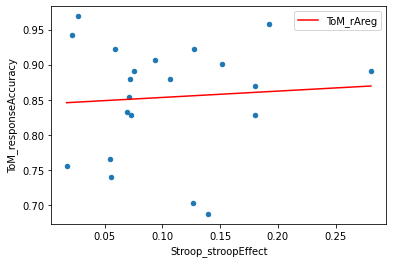

In [91]:
# d = np.polyfit(b_data["Stroop_stroopEffect"], b_data["ToM_responseAccuracy"], 1)
# f = np.poly1d(d)
# b_data.loc[:,"ToM_rAreg"] = f(b_data["Stroop_stroopEffect"])
b_data.sort_values(by="Stroop_stroopEffect",inplace=True)
ax = b_data.plot.scatter(x="Stroop_stroopEffect", y = "ToM_responseAccuracy")
b_data.plot(x="Stroop_stroopEffect", y="ToM_rAreg", ax=ax, color="red")